<a href="https://colab.research.google.com/github/rodespdi/PDA2526/blob/main/Problemas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SESIÓN 1

**Problema 1:** "Inspección de la Imagen" (20 min):

Carga una imagen proporcionada (ej. un fotograma de una animación en formato .png o .tif).

Dimensiones: 1024 x 1024
Número de canales: 3
Imagen RGB


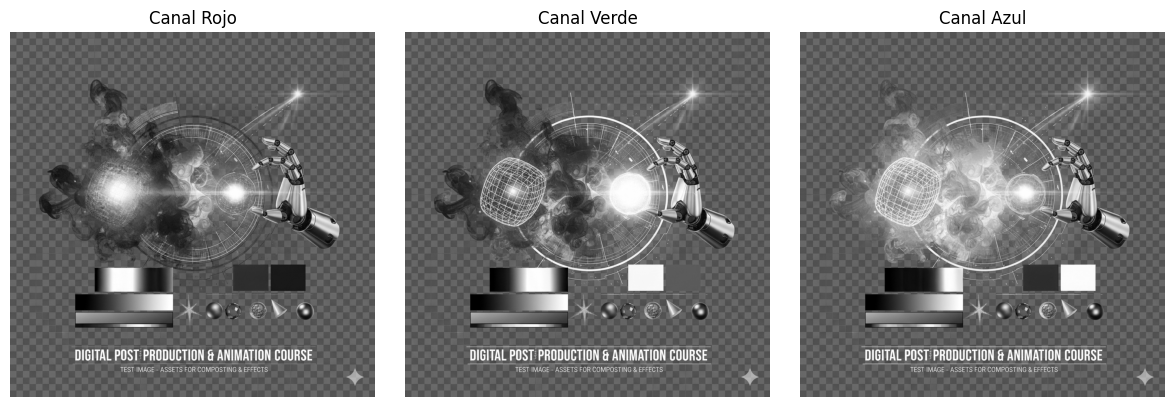

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('imagen.png')  # Replace with actual image path
if img is None:
    raise FileNotFoundError("Image not found.")

# Convert to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Dimensions
alto, ancho, canales = img.shape
print(f'Dimensiones: {alto} x {ancho}')
print(f'Número de canales: {canales}')

# Classification
if canales == 1:
    print('Imagen en escala de grises')
elif canales == 3:
    print('Imagen RGB')
elif canales == 4:
    print('Imagen RGBA')

# Show channels
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, color in enumerate(['Rojo', 'Verde', 'Azul']):
    axs[i].imshow(img_rgb[:,:,i], cmap='gray')
    axs[i].set_title(f'Canal {color}')
    axs[i].axis('off')
plt.tight_layout()
plt.show()

**Problema 2:** "Creando desde la Nada" (20 min):

No cargues ninguna imagen. Crea una nueva imagen desde cero.

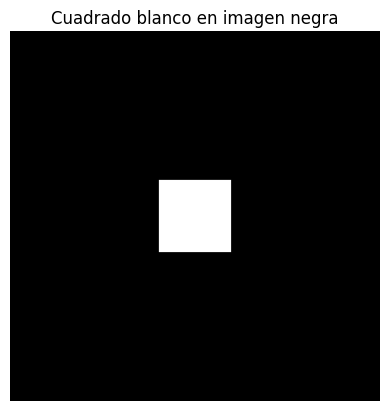

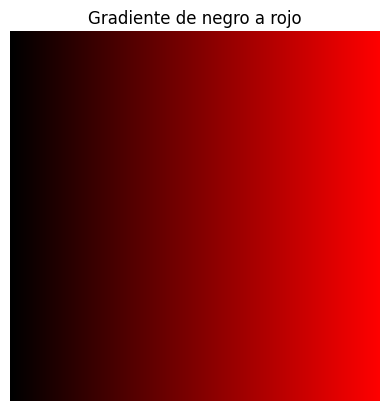

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create black image
img = np.zeros((512, 512, 3), dtype=np.uint8)

# Draw white square
x_ini, x_fin = 206, 306
y_ini, y_fin = 206, 306
img[y_ini:y_fin, x_ini:x_fin] = [255, 255, 255]

# Display image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Cuadrado blanco en imagen negra')
plt.axis('off')
plt.show()

# Bonus: Gradient from black to red
gradiente = np.tile(np.linspace(0, 255, 512, dtype=np.uint8), (512, 1))
img_grad = np.zeros((512, 512, 3), dtype=np.uint8)
img_grad[:,:,0] = gradiente  # Red channel in RGB
plt.imshow(img_grad)
plt.title('Gradiente de negro a rojo')
plt.axis('off')
plt.show()

# SESIÓN 2
**Problema 1:** "Corrección de Color Selectiva" (25 min):

Carga una imagen de un paisaje o un personaje. El objetivo es aumentar la intensidad solo de los colores verdes.

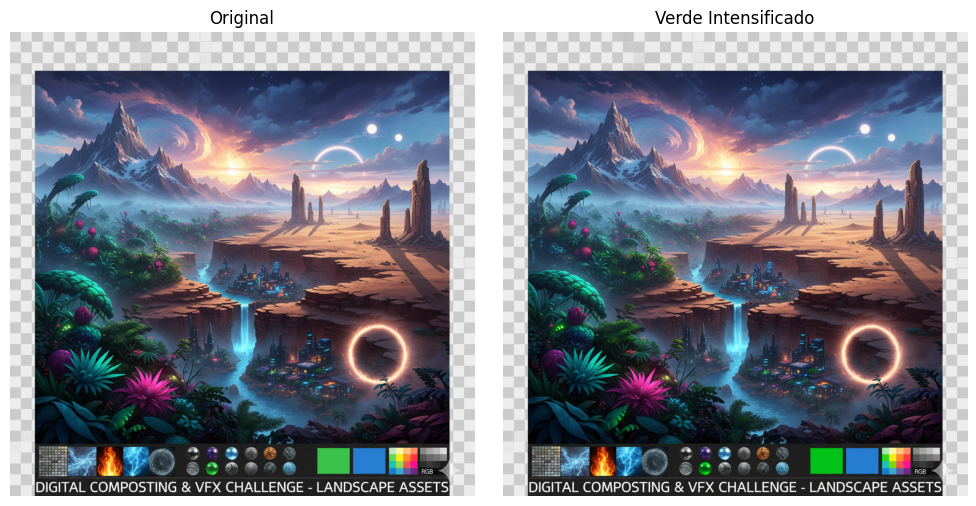

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('paisaje.png')  # Replace with actual image path
if img is None:
    raise FileNotFoundError("Image not found.")

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split channels
H, S, V = cv2.split(hsv)

# Green range in HSV (approx. 60° → 35 to 75 in OpenCV scale)
mascara_verde = (H >= 35) & (H <= 75)

# Increase saturation
S[mascara_verde] = np.clip(S[mascara_verde] * 1.5, 0, 255)

# Merge and convert back to BGR
hsv_mod = cv2.merge([H, S, V])
img_mod = cv2.cvtColor(hsv_mod, cv2.COLOR_HSV2BGR)

# Show original and modified
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(img_mod, cv2.COLOR_BGR2RGB))
axs[1].set_title('Verde Intensificado')
axs[1].axis('off')
plt.tight_layout()
plt.show()


**Problema 2:** "Chroma Key Simplificado" (15 min):

Se proporciona una imagen de un objeto sobre un fondo de color uniforme (ej. un croma verde o azul).

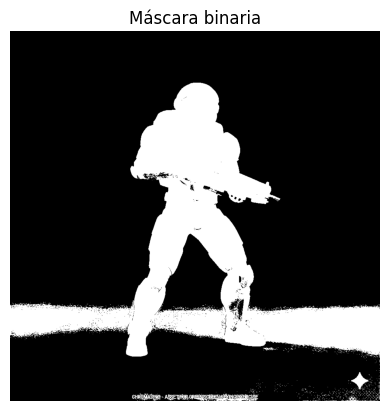

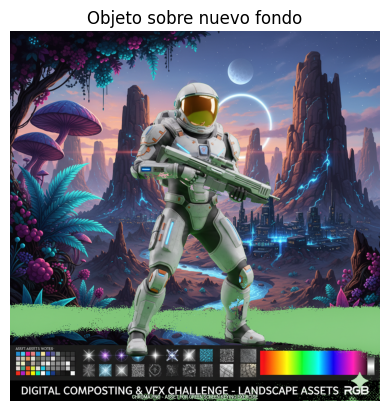

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('croma.png')  # Replace with actual image path
if img is None:
    raise FileNotFoundError("Image not found.")

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(hsv)

# Define green background mask
mascara_fondo = (H >= 35) & (H <= 75) & (S > 100) & (V > 100)

# Binary mask
mascara_binaria = np.uint8(~mascara_fondo) * 255
plt.imshow(mascara_binaria, cmap='gray')
plt.title('Máscara binaria')
plt.axis('off')
plt.show()

# Bonus: Replace background
fondo = cv2.imread('nuevo_fondo.png')  # Replace with actual background
if fondo is None:
    raise FileNotFoundError("Background image not found.")
fondo = cv2.resize(fondo, (img.shape[1], img.shape[0]))

objeto = np.where(mascara_fondo[:,:,None], fondo, img)
plt.imshow(cv2.cvtColor(objeto, cv2.COLOR_BGR2RGB))
plt.title('Objeto sobre nuevo fondo')
plt.axis('off')
plt.show()

# SESIÓN 3

**Problema 1:** "El Coste de la Calidad" (25 min):

Analizar el impacto de la compresión JPEG en una imagen de alta calidad.

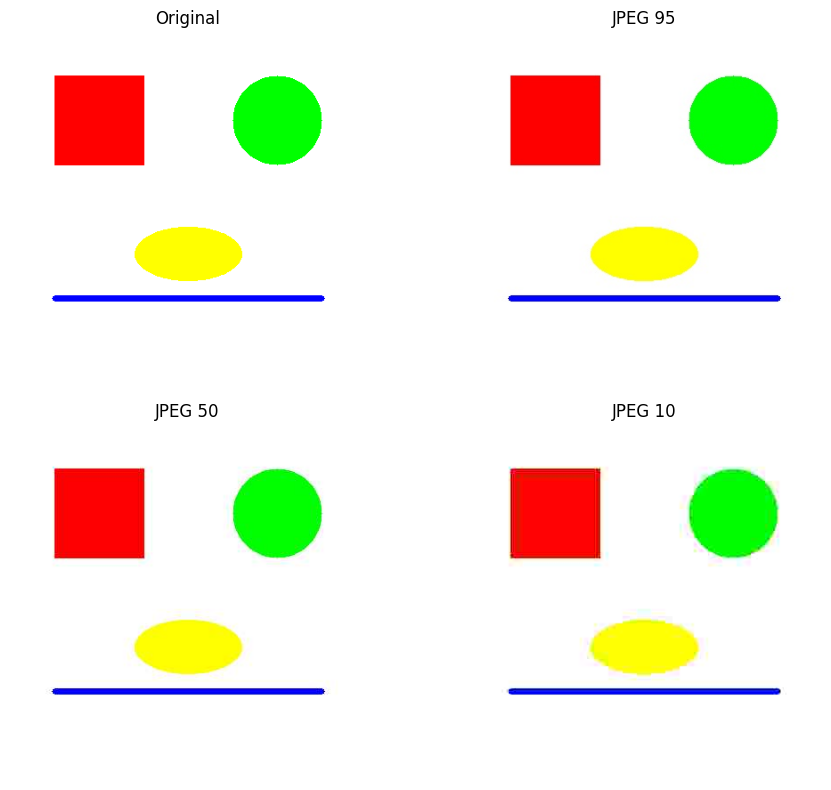

In [16]:

import cv2
import matplotlib.pyplot as plt

# Load original image
img = cv2.imread('original.png')  # Replace with actual image path
if img is None:
    raise FileNotFoundError("Original image not found.")

# Save JPEG versions
cv2.imwrite('img_95.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 95])
cv2.imwrite('img_50.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 50])
cv2.imwrite('img_10.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 10])

# Load compressed images
img_95 = cv2.imread('img_95.jpg')
img_50 = cv2.imread('img_50.jpg')
img_10 = cv2.imread('img_10.jpg')

# Display images
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0,0].set_title('Original')
axs[0,0].axis('off')
axs[0,1].imshow(cv2.cvtColor(img_95, cv2.COLOR_BGR2RGB))
axs[0,1].set_title('JPEG 95')
axs[0,1].axis('off')
axs[1,0].imshow(cv2.cvtColor(img_50, cv2.COLOR_BGR2RGB))
axs[1,0].set_title('JPEG 50')
axs[1,0].axis('off')
axs[1,1].imshow(cv2.cvtColor(img_10, cv2.COLOR_BGR2RGB))
axs[1,1].set_title('JPEG 10')
axs[1,1].axis('off')
plt.tight_layout()
plt.show()

**Problema 2:** "Midiendo la Diferencia" (15 min):

Cuantificar la pérdida de información del ejercicio anterior.

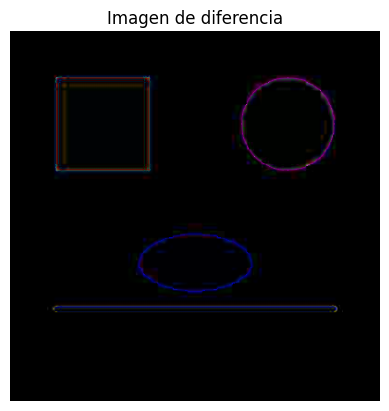

Error Cuadrático Medio (MSE): 105.96


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load original and low quality image
img_orig = cv2.imread('original.png')  # Replace with actual image path
img_low = cv2.imread('img_10.jpg')
if img_orig is None or img_low is None:
    raise FileNotFoundError("Required images not found.")

# Compute absolute difference
diff = cv2.absdiff(img_orig, img_low)
plt.imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
plt.title('Imagen de diferencia')
plt.axis('off')
plt.show()

# Bonus: MSE
mse = np.mean((img_orig.astype(np.float32) - img_low.astype(np.float32)) ** 2)
print(f'Error Cuadrático Medio (MSE): {mse:.2f}')